In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_blobs

In [4]:
data = make_blobs(n_samples=300,
                  n_features=2,
                  centers=2,
                  cluster_std=1.0, random_state=101)

In [6]:
X, y = data

In [9]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [10]:
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
5     -0.319318
6     -0.848077
7      0.605965
8     -2.018168
9      0.740122
10     0.528813
11    -0.589001
12     0.188695
13    -0.758872
14    -0.933237
15     0.955057
16     0.190794
17     1.978757
18     2.605967
19     0.683509
20     0.302665
21     1.693723
22    -1.706086
23    -1.159119
24    -0.134841
25     0.390528
26     0.166905
27     0.184502
28     0.807706
29     0.072960
         ...   
270    0.834355
271   -0.140432
272    0.119145
273    0.665715
274    0.407586
275    0.807843
276   -2.736464
277   -0.985153
278   -0.155276
279   -1.013228
280   -1.087436
281   -2.567767
282    0.661029
283   -0.332921
284   -0.928602
285    1.715950
286   -0.468756
287    0.860097
288    0.230087
289    0.618658
290   -2.052563
291   -0.166646
292   -0.445873
293    0.685874
294    2.785010
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: floa

In [12]:
feat = pd.DataFrame(X)

In [13]:
feat = pd.concat([feat,z_noise], axis=1)

In [15]:
feat.columns = ['X1', 'X2', 'X3']

In [16]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


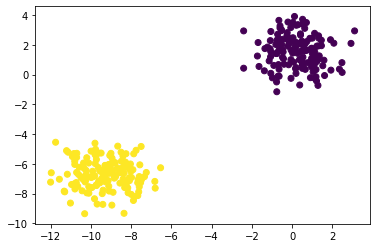

In [22]:
 plt.scatter(feat['X1'], feat['X2'], c=y)

In [23]:
from mpl_toolkits.mplot3d import Axes3D

In [28]:
%matplotlib notebook

<IPython.core.display.Javascript object>


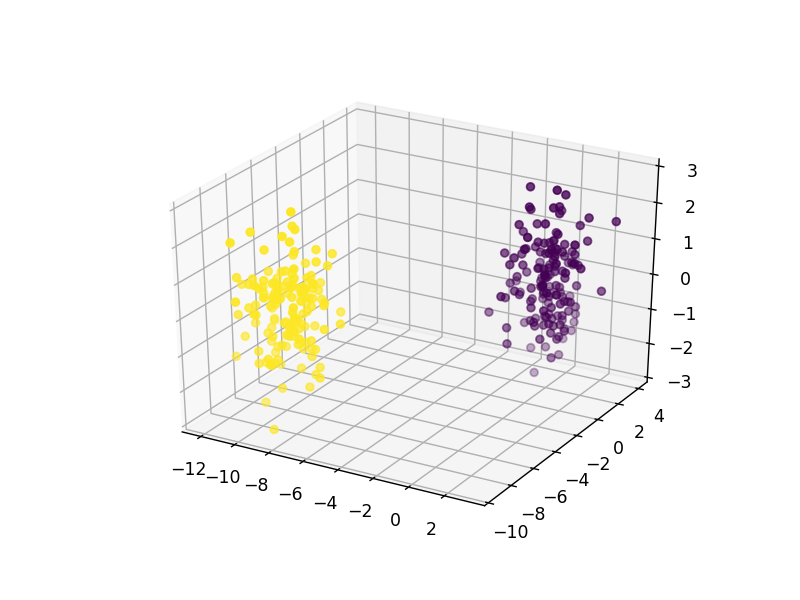

In [31]:
fig = plt.figure()
ax  =fig.add_subplot(111,projection='3d')
ax.scatter(feat['X1'], feat['X2'], feat['X3'], c=y)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [33]:
encoder = Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

In [34]:
# 2 ---> 3
decoder = Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [35]:
# ENCODER
# 3 ---> 2 ----> 3
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse" ,optimizer=SGD(lr=1.5))

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
# Note how all the data is used! There is no "right" answer here
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [38]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Train on 300 samples
Epoch 1/5
300/300 [==============================] - 2s 6ms/sample - loss: 0.2291
Epoch 2/5
300/300 [==============================] - 0s 177us/sample - loss: 0.1307
Epoch 3/5
300/300 [==============================] - 0s 180us/sample - loss: 0.1153
Epoch 4/5
300/300 [==============================] - 0s 179us/sample - loss: 0.1553
Epoch 5/5
300/300 [==============================] - 0s 185us/sample - loss: 0.1028


In [39]:
encoded_2dim = encoder.predict(scaled_data)

In [40]:
encoded_2dim

array([[0.0000000e+00, 0.0000000e+00],
       [1.2396867e+00, 0.0000000e+00],
       [1.1732621e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [1.0016496e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [1.3219600e+00, 0.0000000e+00],
       [1.1220720e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [1.2766676e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [1.0295682e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [1.1172760e+00, 0.0000000e+00],
       [1.0528054e+00, 0.0000000e+00],
       [9.6376520e-01, 0.0000000e+00],
       [8.9017147e-01, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [1.1982229e+00, 0.0000000e+00],
       [1.3223138e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [1.1204538e+00, 0.

<IPython.core.display.Javascript object>


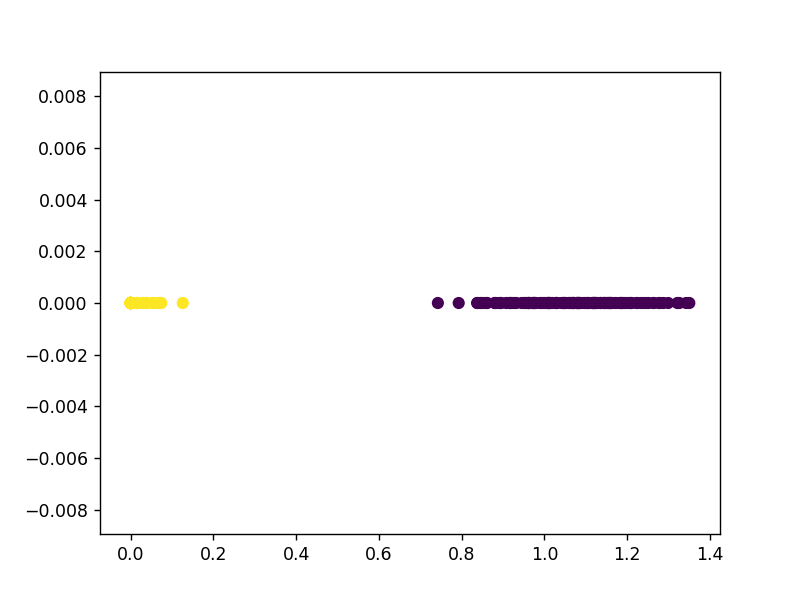

In [41]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)